In [1]:
# Importing all necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_classif

In [2]:
# Loading the dataset
df = pd.read_excel("C:/Users/Ansh/Desktop/Main Flow/heart.xlsx")

# Convert inf values to NaN
df.replace([np.inf, -np.inf], np.nan, inplace=True)

In [3]:
# Display the first few rows of the dataset
print("Dataset Overview:")
print(df.head())

Dataset Overview:
   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   52    1   0       125   212    0        1      168      0      1.0      2   
1   53    1   0       140   203    1        0      155      1      3.1      0   
2   70    1   0       145   174    0        1      125      1      2.6      0   
3   61    1   0       148   203    0        1      161      0      0.0      2   
4   62    0   0       138   294    1        1      106      0      1.9      1   

   ca  thal  target  
0   2     3       0  
1   0     3       0  
2   0     3       0  
3   1     3       0  
4   3     2       0  


In [4]:
# Display column names
print("Column Names:")
print(df.columns.values)

Column Names:
['age' 'sex' 'cp' 'trestbps' 'chol' 'fbs' 'restecg' 'thalach' 'exang'
 'oldpeak' 'slope' 'ca' 'thal' 'target']


In [5]:
# Checking for null values
print("Null Values in Each Column:")
print(df.isna().sum())

Null Values in Each Column:
age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


In [6]:
# Data type and basic info
print("Dataset Info:")
df.info()

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [7]:
# Descriptive statistics of the dataset
print("Statistical Summary:")
print(df.describe())

Statistical Summary:
               age          sex           cp     trestbps        chol  \
count  1025.000000  1025.000000  1025.000000  1025.000000  1025.00000   
mean     54.434146     0.695610     0.942439   131.611707   246.00000   
std       9.072290     0.460373     1.029641    17.516718    51.59251   
min      29.000000     0.000000     0.000000    94.000000   126.00000   
25%      48.000000     0.000000     0.000000   120.000000   211.00000   
50%      56.000000     1.000000     1.000000   130.000000   240.00000   
75%      61.000000     1.000000     2.000000   140.000000   275.00000   
max      77.000000     1.000000     3.000000   200.000000   564.00000   

               fbs      restecg      thalach        exang      oldpeak  \
count  1025.000000  1025.000000  1025.000000  1025.000000  1025.000000   
mean      0.149268     0.529756   149.114146     0.336585     1.071512   
std       0.356527     0.527878    23.005724     0.472772     1.175053   
min       0.000000     0.

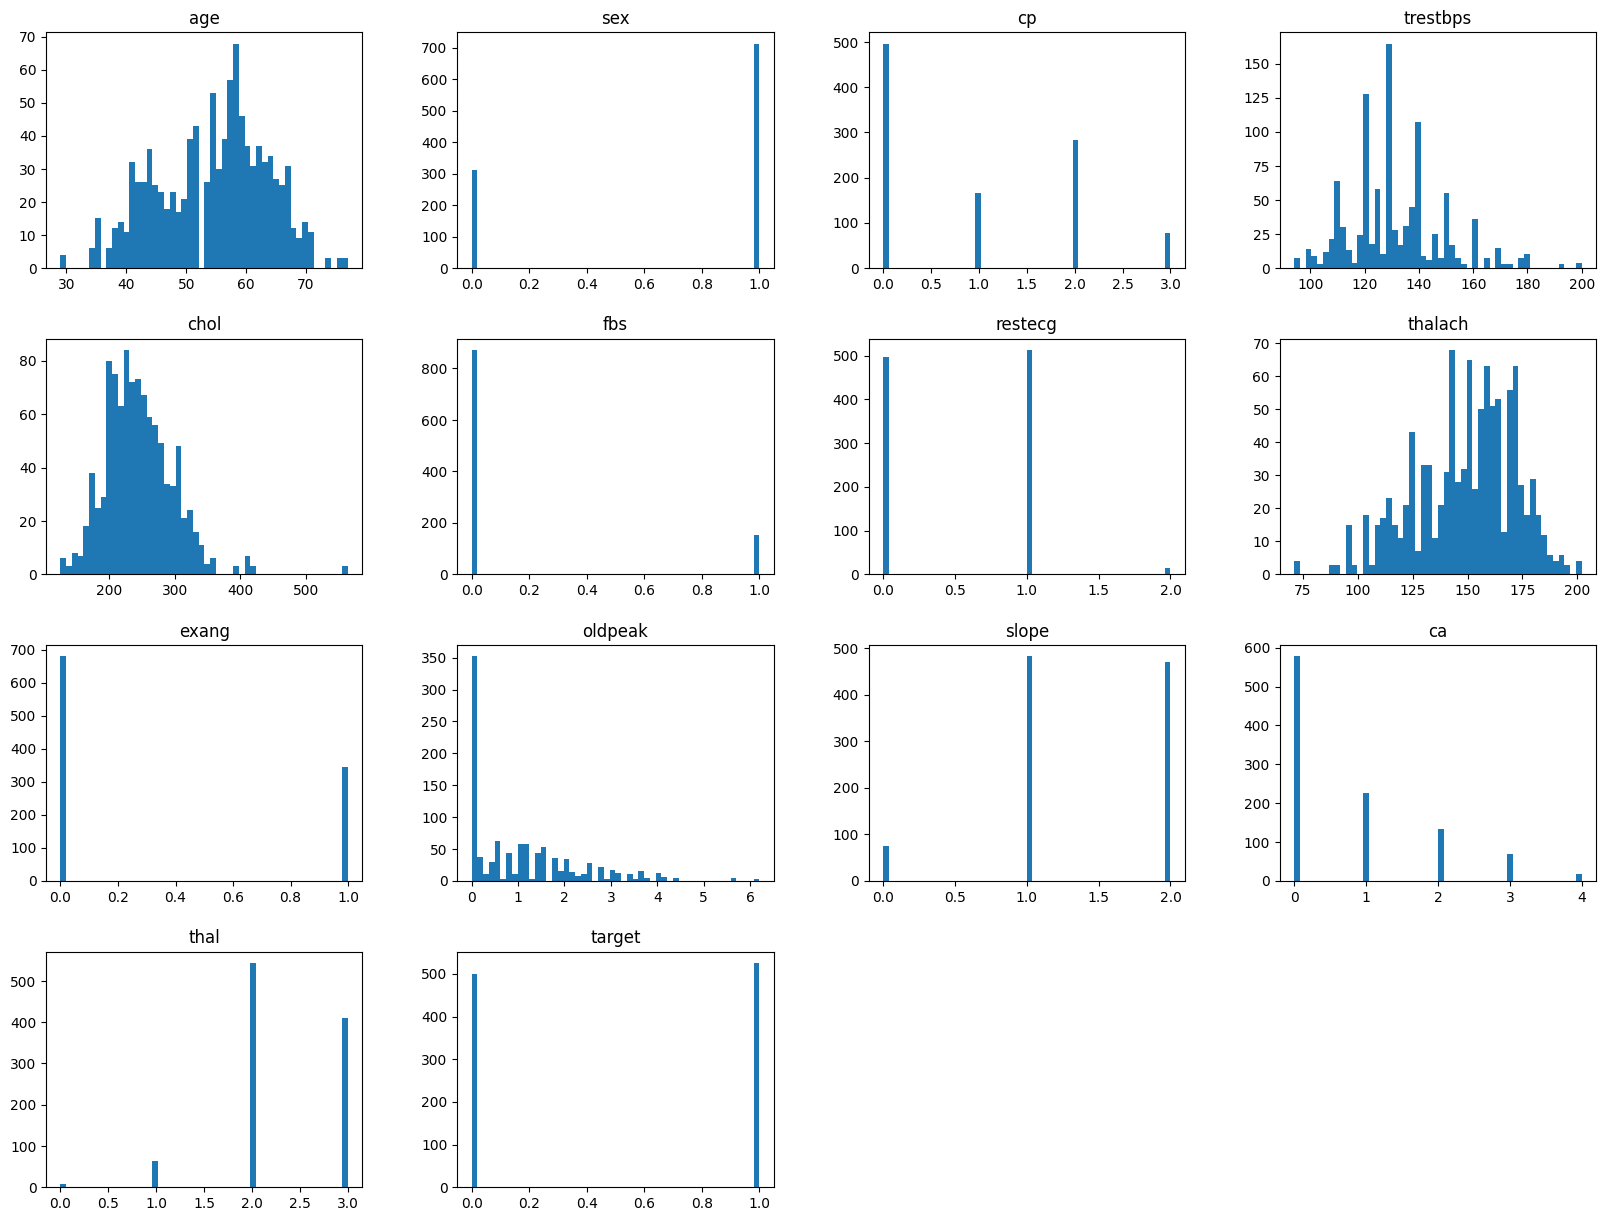

In [8]:
# Visualizing distributions of numerical features
df.hist(bins=50, grid=False, figsize=(20,15))
plt.show()

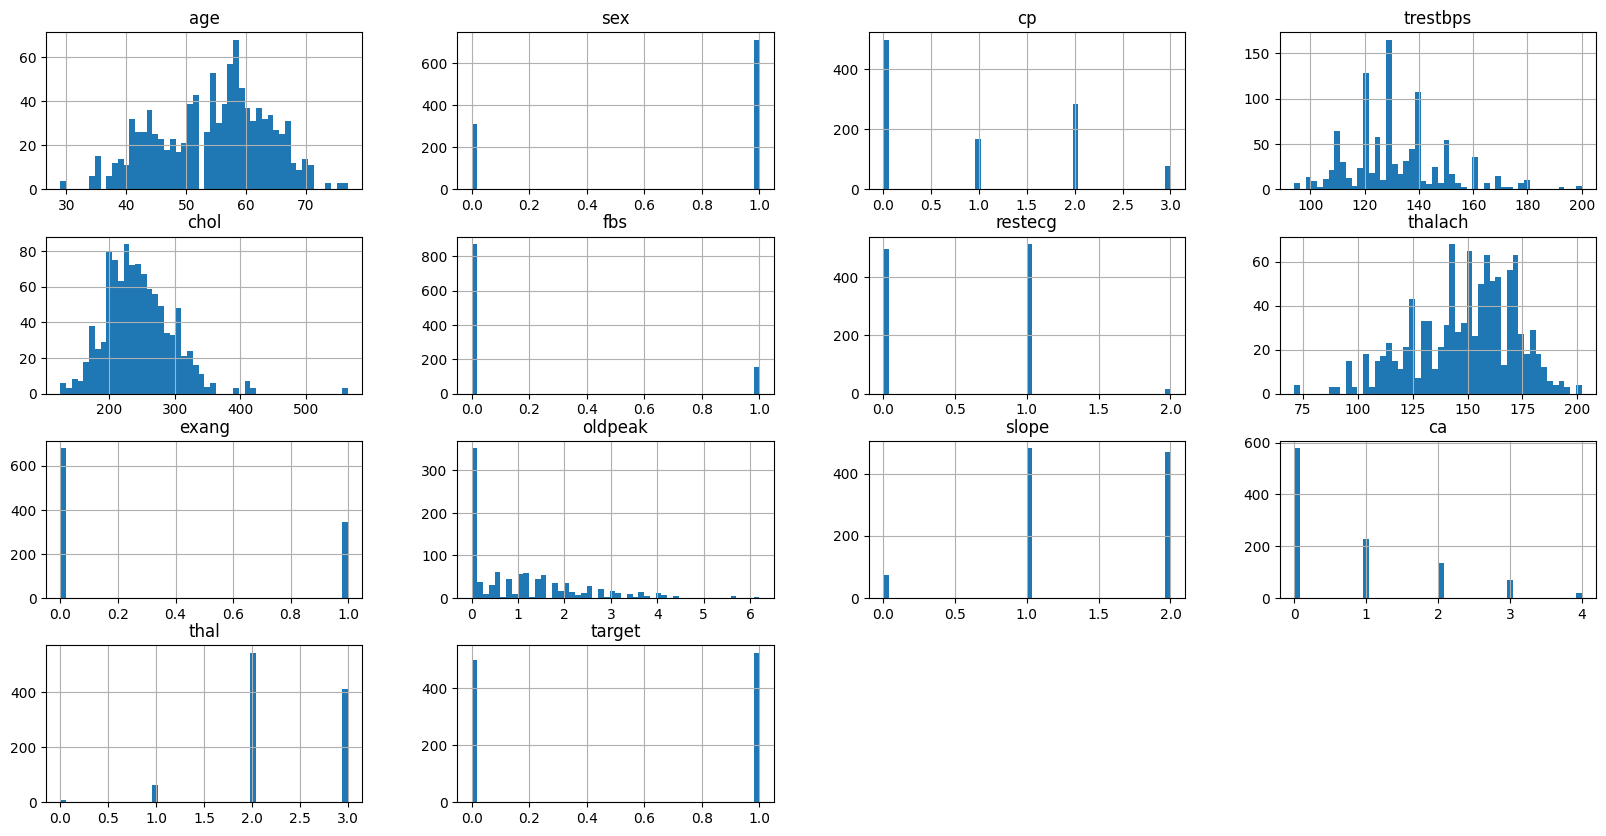

In [9]:
# Visualizing distributions of numerical features
df.hist(bins=50, grid=True, figsize=(20,10))
plt.show()

In [10]:
# Exploring specific questions:
questions = [
    "1. How many people have heart disease and how many don't?",
    "2. Which sex has the most heart disease?",
    "3. Which sex has which type of chest pain most?",
    "4. Which chest pain type is most prone to heart disease?",
    "5. Distribution of age and its relation to heart disease",
    "6. Maximum heart rate and its impact on heart disease",
    "7. Relation between resting blood pressure and heart disease"
]

1. How many people have heart disease and how many don't?
target
1    526
0    499
Name: count, dtype: int64


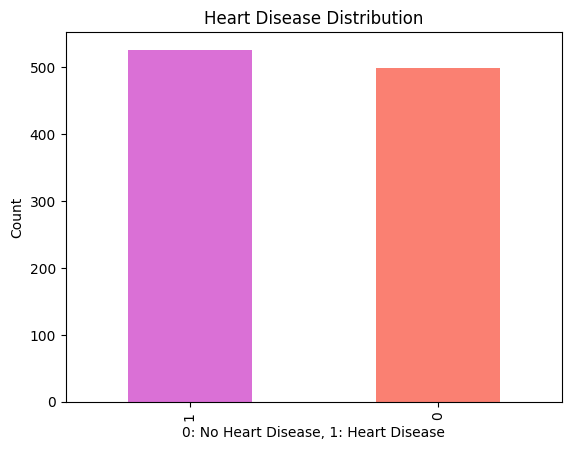

In [11]:
# 1. How many people have heart disease and how many don't?
print(questions[0])
print(df['target'].value_counts())

# Plotting the count of heart disease cases
df['target'].value_counts().plot(kind='bar', color=["orchid", "salmon"])
plt.title("Heart Disease Distribution")
plt.xlabel("0: No Heart Disease, 1: Heart Disease")
plt.ylabel("Count")
plt.show()

2. Which sex has the most heart disease?
sex       0    1
target          
0        86  413
1       226  300


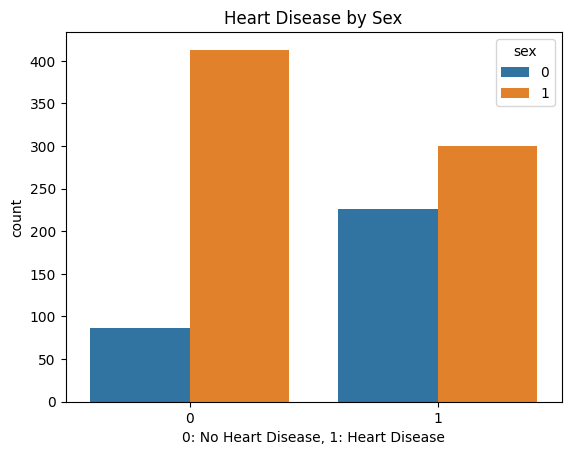

In [12]:
# 2. Which sex has the most heart disease?
print(questions[1])
print(pd.crosstab(df.target, df.sex))

sns.countplot(x='target', data=df, hue='sex')
plt.title("Heart Disease by Sex")
plt.xlabel("0: No Heart Disease, 1: Heart Disease")
plt.show()

3. Which sex has which type of chest pain most?
cp
0    497
2    284
1    167
3     77
Name: count, dtype: int64


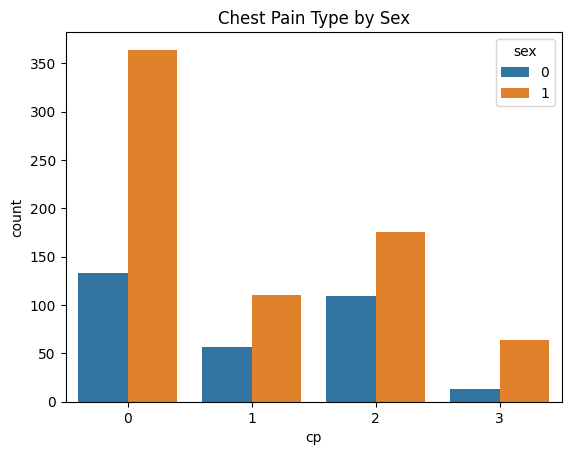

In [13]:
# 3. Which sex has which type of chest pain most?
print(questions[2])
print(df['cp'].value_counts())

sns.countplot(x='cp', data=df, hue='sex')
plt.title("Chest Pain Type by Sex")
plt.show()

4. Which chest pain type is most prone to heart disease?
target    0    1
cp              
0       375  122
1        33  134
2        65  219
3        26   51


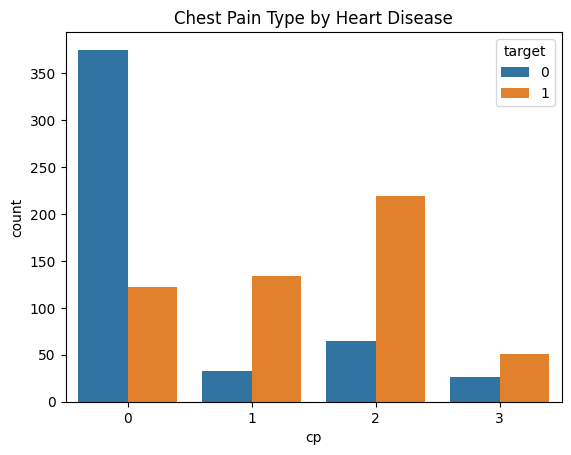

In [14]:
# 4. Which chest pain type is most prone to heart disease?
print(questions[3])
print(pd.crosstab(df.cp, df.target))

sns.countplot(x='cp', data=df, hue='target')
plt.title("Chest Pain Type by Heart Disease")
plt.show()

C:\Users\Ansh\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Ansh\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\Ansh\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\Ansh\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-

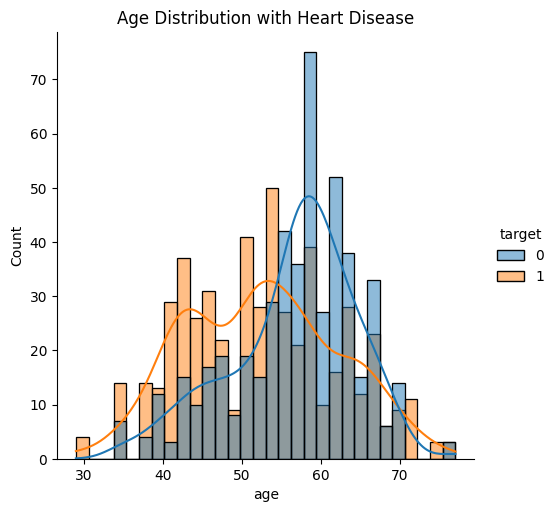

In [15]:
# 5. Distribution of age and its relation to heart disease
sns.displot(x='age', data=df, kde=True, bins=30, hue='target')
plt.title("Age Distribution with Heart Disease")
plt.show()

C:\Users\Ansh\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Ansh\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\Ansh\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\Ansh\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-

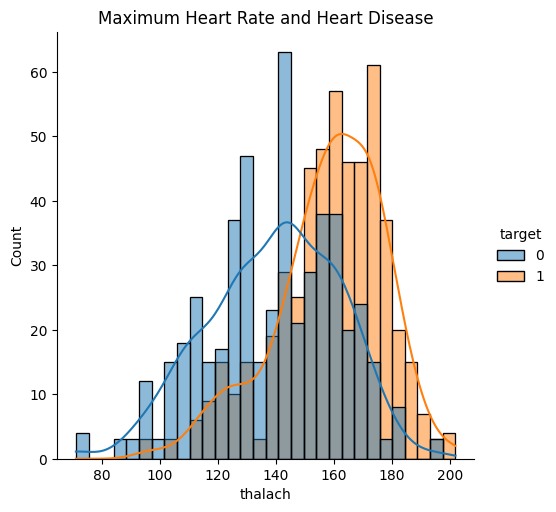

In [16]:
# 6. Maximum heart rate and its impact on heart disease
sns.displot(x='thalach', data=df, kde=True, bins=30, color='chocolate', hue='target')
plt.title("Maximum Heart Rate and Heart Disease")
plt.show()

C:\Users\Ansh\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Ansh\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\Ansh\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\Ansh\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-

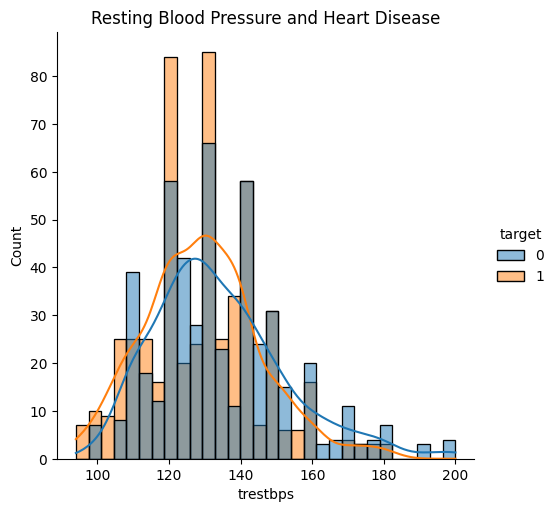

In [17]:
# 7. Resting blood pressure and its relation to heart disease
sns.displot(x='trestbps', data=df, kde=True, bins=30, color='skyblue', hue='target')
plt.title("Resting Blood Pressure and Heart Disease")
plt.show()

In [18]:
# Feature Engineering: Creating new features (e.g., BMI, cholesterol-blood pressure ratio)
df['chol_bp_ratio'] = df['chol'] / df['trestbps']
df['age_thalach_ratio'] = df['age'] / df['thalach']

In [19]:
# Feature Selection: Using PCA and Feature Importance
# Splitting the dataset into features and target variable
X = df.drop('target', axis=1)
y = df['target']

# Standardizing the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [20]:
# Applying PCA
pca = PCA(n_components=5)  # Reducing to 5 principal components for simplicity
X_pca = pca.fit_transform(X_scaled)

In [21]:
# Using SelectKBest for feature selection
selector = SelectKBest(score_func=f_classif, k=10)
X_new = selector.fit_transform(X, y)

In [22]:
# Using RandomForestClassifier for feature importance
model = RandomForestClassifier(random_state=42)
model.fit(X_new, y)
importances = model.feature_importances_

In [23]:
# Displaying feature importances
feature_names = X.columns[selector.get_support()]
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

print("\nTop Features based on Random Forest Importance:")
print(importance_df)


Top Features based on Random Forest Importance:
             Feature  Importance
2                 cp    0.156111
7                 ca    0.131463
5            oldpeak    0.123308
3            thalach    0.122212
8               thal    0.119441
9  age_thalach_ratio    0.114638
0                age    0.094604
4              exang    0.059173
6              slope    0.042675
1                sex    0.036375


In [24]:
# Splitting data for model training and testing
X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.3, random_state=42)

# Training the model
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [25]:
# Making predictions and evaluating the model
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print(f"\nModel Accuracy: {accuracy:.2f}")


Model Accuracy: 0.99
